<a href="https://colab.research.google.com/github/StoneMason495/cap-comp215/blob/main/examples/week4Jan30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Genertors and Random Numbers
This is our week 4 examples notebook and will be available on Github from the powderflask/cap-comp215 repository.

As usual, the first code block just imports the modules we will use.

In [2]:
import random
import matplotlib.pyplot as plt
from pprint import pprint

## Examples: generator expressions

In [3]:
neighbours = ((i-1, i, i+1) for i in range(1, 10))
print(neighbours)
# We can turn a generator into a list to look at all its elements (though this somewhat defeats the purpose!)
print(list(neighbours))
'''Once the "stream" has flowed past, it is empty - there is no way to "replenish" it.'''
print(list(neighbours))


<generator object <genexpr> at 0x7fde17de6a50>
[(0, 1, 2), (1, 2, 3), (2, 3, 4), (3, 4, 5), (4, 5, 6), (5, 6, 7), (6, 7, 8), (7, 8, 9), (8, 9, 10)]
[]


In [4]:
def generate_neighbours():
  i = 1
  while True:
    yield (i-1, i, i+1) #using yield instead of return makes this function a generator
    i = i+1

neighbours2 = generate_neighbours()
print(neighbours2)
for el in range(20):
  print(next(neighbours2))
# print(list(neighbours2))
# print(list(neighbours2))

<generator object generate_neighbours at 0x7fde17de66d0>
(0, 1, 2)
(1, 2, 3)
(2, 3, 4)
(3, 4, 5)
(4, 5, 6)
(5, 6, 7)
(6, 7, 8)
(7, 8, 9)
(8, 9, 10)
(9, 10, 11)
(10, 11, 12)
(11, 12, 13)
(12, 13, 14)
(13, 14, 15)
(14, 15, 16)
(15, 16, 17)
(16, 17, 18)
(17, 18, 19)
(18, 19, 20)
(19, 20, 21)


## Pseudo-Random Numbers

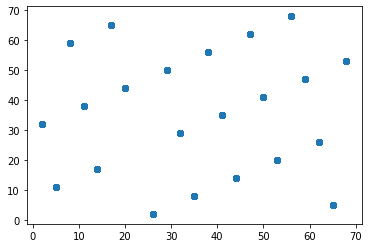

In [30]:
def rand2(seed=4):
  while True:
    seed = seed//10 + 7*(seed%10)
    yield seed

rand = rand2(seed=random.randint(1,99))
xs = [next(rand) for i in range(10000)]
ys = [next(rand) for i in range(10000)]
plt.scatter(xs, ys)

In [6]:
# A list of n random numbers - again we are turning a "generator" in to a list
n = 10
[random.random() for i in range(n)]

[0.6752700755406216,
 0.9839216643497811,
 0.3229941247755881,
 0.7476070463216241,
 0.5954714644730391,
 0.698250830299538,
 0.5171792419289213,
 0.5170462788954646,
 0.4433246518213845,
 0.9306131524606689]

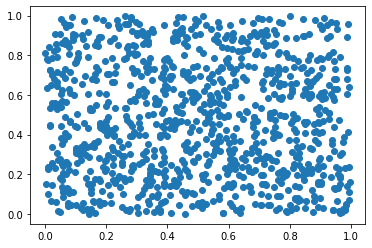

In [35]:
# Scatter plot of random (x,y) coordinates
n = 1000
fig, ax = plt.subplots()
ax.scatter([random.random() for i in range(n)], [random.random() for i in range(n)])
ax

## Chaotic Feedback

 * some mathematical functions produce chaotic patterns when you feed their output back in as the next input.

In [39]:
import time

class TwoDigitRand:
    """ demonstrates 'chaotic feedback' algorithm - not crypographic quality randomness!! """
    def __init__(self, seed=None):
        seed = seed or int(time.time()*10**3)  # clock time in milli-seconds
        self.seed = seed % 100  # 2-digit only!

    def rand(self):
        """ chaotic feedback algorithm - the last output is used as input to compute the next one """
        self.seed = self.seed//10 + 7*(self.seed%10)
        return self.seed


r = TwoDigitRand()
[r.rand() for i in range(20)]

[13, 22, 16, 43, 25, 37, 52, 19, 64, 34, 31, 10, 1, 7, 49, 67, 55, 40, 4, 28]

Sequence seed: 37


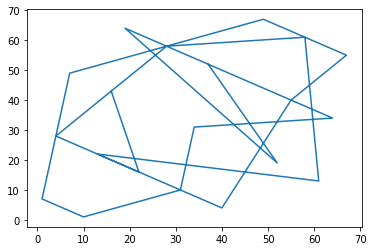

In [9]:
# Scatter plot of (seed, rand(seed))
fig, ax = plt.subplots()
print("Sequence seed:", r.seed)
pairs = [(r.seed, r.rand()) for i in range(n)]
ax.plot([x for x,y in pairs], [y for x,y in pairs])
ax

## Example: computational experiment with random numbers

We'll use the Histogram class developed last week to count the outcomes of the experiment

In [10]:
class Histogram:
    """ A simple histogram with a nice API """
    def __init__(self, title, xlabel=None):
        fig, ax = plt.subplots()
        ax.set_title(title)
        if xlabel:
            ax.set_xlabel(xlabel)
        ax.set_ylabel('Count')
        self.ax = ax
        self.fig = fig
        self.counts = {}

    def count(self, category):
        self.counts[category] = self.counts.get(category, 0) + 1

    def plot(self):
        self.ax.bar(self.counts.keys(), self.counts.values())
        plt.show()

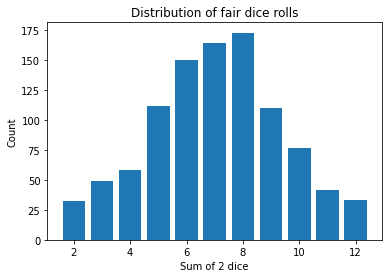

In [42]:
# Experiment: Roll some dice
def roll_dice(sides=6):
    return (random.randint(1,sides), random.randint(1,sides))

# number rolls to use in this experiment
n_rolls = 1000

rolls = Histogram("Distribution of fair dice rolls", xlabel='Sum of 2 dice')
for i in range(n_rolls):
    rolls.count(sum(roll_dice()))

rolls.plot()